In [19]:
import numpy as np
import pandas as pd
from google.colab import files

In [20]:
df_evcs = pd.read_csv("evcs_by_zip.csv")
df_evreg = pd.read_csv("Sept2022_EVRegistration.csv")
df_demo = pd.read_csv("Dallas_demographics_readyformodel.csv")

In [21]:
df_demo = df_demo.rename(columns={"Zip Code": "zip_code"})

In [22]:
df_evcs = df_evcs.rename(columns={"ZIP": "zip_code"})

In [23]:
df_evreg = df_evreg.rename(columns={"Zip Code": "zip_code"})

In [25]:
df = df_evcs.set_index('zip_code').join(df_demo.set_index('zip_code'))

In [33]:
df = df.join(df_evreg.set_index('zip_code'),lsuffix='_caller', rsuffix='_other')

In [34]:
df = df.drop(columns=['Unnamed: 0_caller', 'Unnamed: 0_other', 'Year'])

In [37]:
df = df.rename(columns={"count": "EV Charing Station Count", "Grand Total": "EV Registration Count"})[1:]

In [50]:
df = df.drop([75207.0])

In [39]:
df.to_csv('dallas_df.csv') 
files.download('dallas_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
import statsmodels.api as sm

In [51]:
x = df.loc[:, df.columns != 'EV Charing Station Count']
y = df['EV Charing Station Count']

In [52]:
x = sm.add_constant(x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [53]:
result = sm.OLS(y, x).fit()

In [54]:
print(result.summary())

                               OLS Regression Results                               
Dep. Variable:     EV Charing Station Count   R-squared:                       0.413
Model:                                  OLS   Adj. R-squared:                  0.204
Method:                       Least Squares   F-statistic:                     1.972
Date:                      Sat, 29 Oct 2022   Prob (F-statistic):              0.146
Time:                              15:40:40   Log-Likelihood:                -27.810
No. Observations:                        20   AIC:                             67.62
Df Residuals:                            14   BIC:                             73.59
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

In [55]:
import seaborn as sns

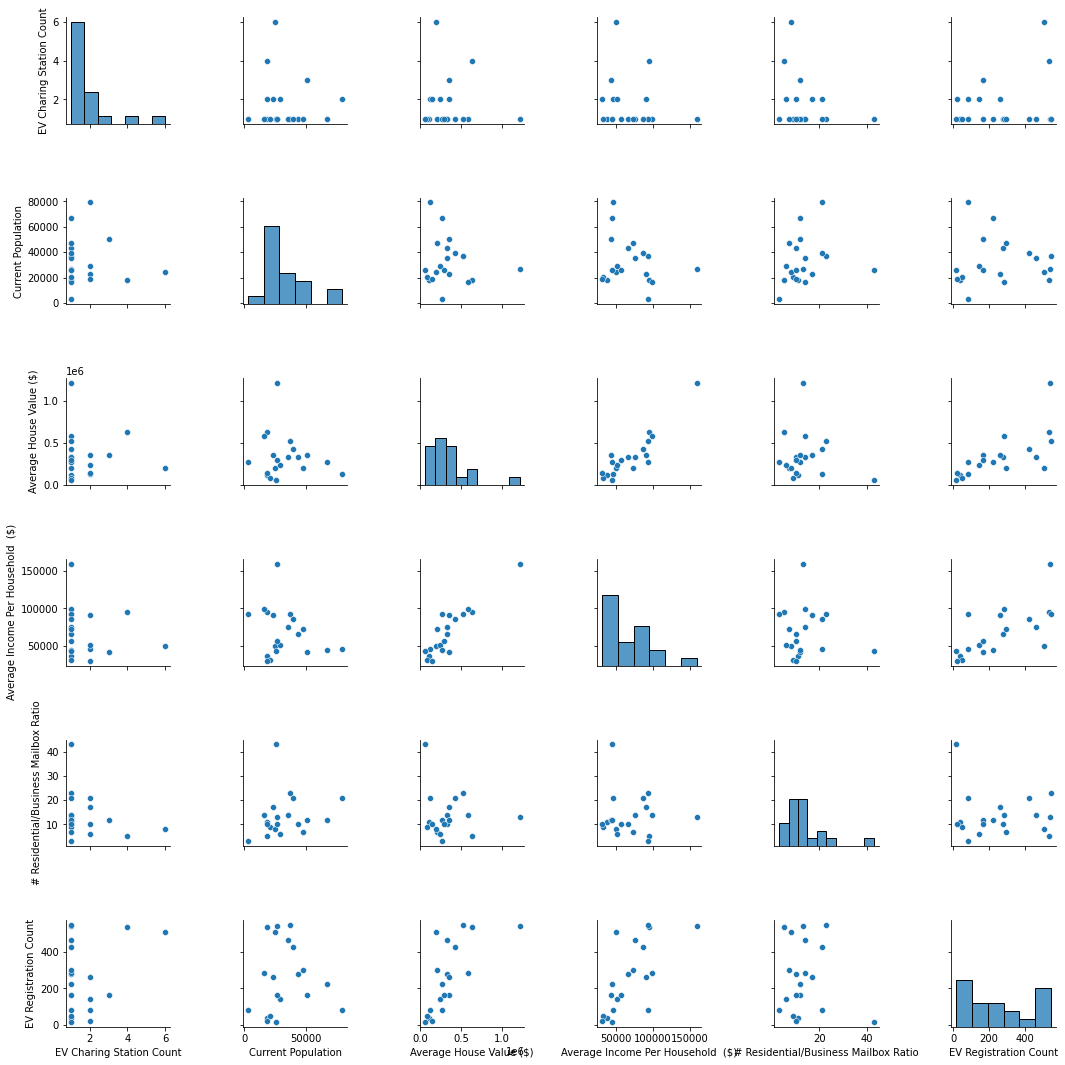

In [57]:
sns.pairplot(df.loc[:, 'EV Charing Station Count':])